# Tutorial 9 - Interpolation with Julia

Last tutorial, we introduced basic scientific computation problems with Julia, namely, problems involving Taylor Series approximations and linear systems. In this lecture, we will cover examples of interpolation using Julia.

## Exercise 1 - Monomial Interpolation

Use the Monomial interpolation process to obtain a polynomial of least degree that assumes these values:

| x |  y |
|---|--- |
| 0 |  8 |
| 2 | 11 |
| 3 | 28 |

Recall that since there are $n = 3$ points, the interpolating polynomial is degree $n - 1 = 3 - 1 = 2$. Also recall the 3x3 Vandermonde coefficient matrix:

$$X = \begin{bmatrix}
   1 & x_0 & x_0^2 \\
   1 & x_1 & x_1^2 \\
   1 & x_2 & x_2^2
\end{bmatrix}$$

We need to solve the following system for $c_0, c_1, c_2$:

$$Xc = \begin{bmatrix}
   1 & x_0 & x_0^2 \\
   1 & x_1 & x_1^2 \\
   1 & x_2 & x_2^2
\end{bmatrix} \begin{bmatrix}
   c_0 \\
   c_1 \\
   c_2
\end{bmatrix} =\begin{bmatrix}
   y_0 \\
   y_1 \\
   y_2
\end{bmatrix} $$

First, we must input the values from our table:

$$Xc = \begin{bmatrix}
   1 & 0 & 0^2 \\
   1 & 2 & 2^2 \\
   1 & 3 & 3^2
\end{bmatrix} \begin{bmatrix}
   c_0 \\
   c_1 \\
   c_2
\end{bmatrix} =\begin{bmatrix}
   8 \\
   11 \\
   28
\end{bmatrix} $$

$$Xc = \begin{bmatrix}
   1 & 0 & 0 \\
   1 & 2 & 4 \\
   1 & 3 & 9
\end{bmatrix} \begin{bmatrix}
   c_0 \\
   c_1 \\
   c_2
\end{bmatrix} =\begin{bmatrix}
   8 \\
   11 \\
   28
\end{bmatrix} $$

We can solve this system manually (as expected in an exam) or using Julia:

In [14]:
using LinearAlgebra

x_data = [0; 2; 3]
y_data = [8; 11; 28]

vand = [ones(size(x_data,1)) x_data x_data.^2 ] # create Vandermonde matrix
display(vand)
c = vand\y_data

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 1.0  2.0  4.0
 1.0  3.0  9.0

3-element Vector{Float64}:
  8.0
 -8.833333333333334
  5.166666666666667

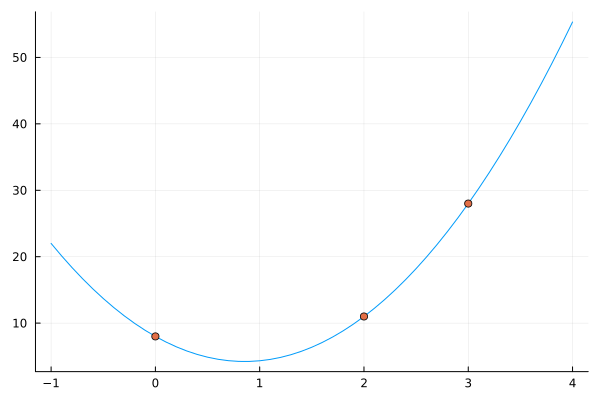

In [15]:
using Plots

x = -1:0.1:4
p = (x) -> @. c[1] + c[2]*x + c[3]*x^2
plot(x,p(x))
scatter!(x_data, y_data, legend=false)

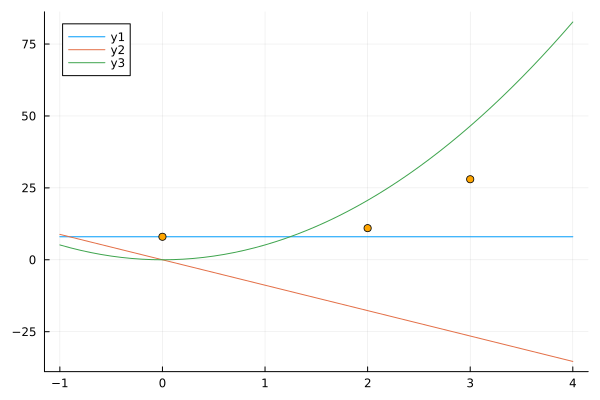

In [16]:
plot(x, c[1].*ones(size(x)))
plot!(x, @. c[2]*x)
plot!(x, @. c[3]*x^2)
scatter!(x_data, y_data, color=:orange, label="")

In [17]:
# check that p_3(0) = 8
p(0)

8.0

Ultimately, we have the interpolating polynomial $p(x) = 5.16x^2 - 8.83x + 8$

## Exercise 2 - Lagrange Interpolation

Use the Lagrange interpolation process to obtain a polynomial of least degree that assumes these values:

| x | y  |
|---|--- |
| 0 |  7 |
| 2 | 11 |
| 3 | 28 |
| 4 | 63 |

To solve this problem, find the cardinal polynomials and plug into the interpolation formula. Since we have 4 points, $n = 4 - 1 = 3$. 

Recall:

$$p_n(x) = \sum_{j=0}^n y_j L_j(x_i) $$

$$L_j(x_i) = \prod_{i = 0, i \neq j}^n \frac{x - x_i}{x_j - x_i} $$

First, we can compute our $L_j$ values:

$$L_0(x) = \frac{(x - 2)(x - 3)(x - 4)}{(0 - 2)(0 - 3)(0 - 4)} = -\frac{1}{24}(x - 2)(x - 3)(x - 4)$$

$$L_1(x) = \frac{(x - 0)(x - 3)(x - 4)}{(2 - 0)(2 - 3)(2 - 4)} = \frac{1}{4}(x)(x - 3)(x - 4)$$

$$L_2(x) = \frac{(x - 0)(x - 2)(x - 4)}{(3 - 0)(3 - 2)(3 - 4)} = -\frac{1}{3}(x)(x - 2)(x - 4)$$

$$L_3(x) = \frac{(x - 0)(x - 2)(x - 3)}{(4 - 0)(4 - 2)(4 - 3)} = \frac{1}{8}(x)(x - 2)(x - 3)$$

Now that we have our Lagrange basis $\{L_0(x),...,L_3(x)\}$, we can use it to compute $p_n$ by multiplying each polynomial by its corresponding $y_j$, then adding everything:

$$p_3(x) = -(7)\frac{1}{24}(x - 2)(x - 3)(x - 4) + (11)\frac{1}{4}(x)(x - 3)(x - 4) - (28)\frac{1}{3}(x)(x - 2)(x - 4) + (63)\frac{1}{8}(x)(x - 2)(x - 3)$$

$$p_3(x) = -\frac{7}{24}(x - 2)(x - 3)(x - 4) + \frac{11}{4}(x)(x - 3)(x - 4) - \frac{28}{3}(x)(x - 2)(x - 4) + \frac{63}{8}(x)(x - 2)(x - 3)$$

$$p_3(x) = x^3 - 2x + 7$$

We can plot this polynomial in Julia as follows:

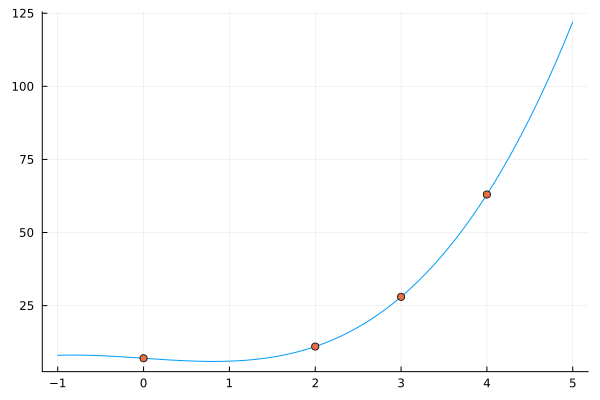

In [35]:
using Plots

l0 = (x) -> @. -(x-2)*(x-3)*(x-4)/24
l1 = (x) -> @. (x-0)*(x-3)*(x-4)/4
l2 = (x) -> @. -(x-0)*(x-2)*(x-4)/3
l3 = (x) -> @. (x-0)*(x-2)*(x-3)/8

p = (x) -> @. 7*l0(x) + 11*l1(x) + 28*l2(x) + 63*l3(x)

x = -1:0.1:5
plot(x,p(x))
scatter!([0,2,3,4],[7,11,28,63],legend=false)

Notice that the points refer to the given x and y values. The interpolating polynomial must pass through all points. If there are n points, the interpolating polynomial is degree n - 1, starting with the trivial case of the constant function passing through one point, to the linear function, and to higher degree polynomials such as quintics.

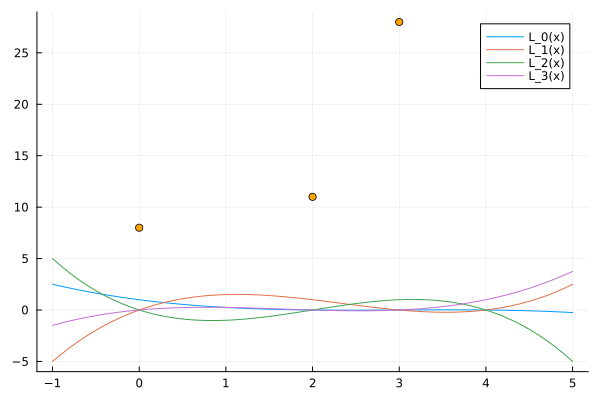

In [37]:
plot(x, l0(x), label="L_0(x)")
plot!(x, l1(x), label="L_1(x)")
plot!(x, l2(x), label="L_2(x)")
plot!(x, l3(x), label="L_3(x)")
scatter!(x_data, y_data, color=:orange, label="")

It is also a good idea to evaluate the interpolating polynomial at the given $x_j$ s and see if the evaluation equals the $y_j$ s. If this does not happen, the interpolating polynomial is incorrect.

In [39]:
# check that p_3(0) = 7
p(0)

7.0

## Exercise 3 - Newton Interpolation

Use a divided-difference table to show that the following data can be represented by a polynomial of degree 3:

| x  | y  |
|----|----|
| -2 | 1  |
| -1 | 4  |
| 0  | 11 |
| 1  | 16 |
| 2  | 13 |
| 3  | -4 |

What is the Newton interpolating polynomial?

We need to compute up to the fourth differences to check this result. The idea here is that the last n-difference with non-zero entries will be the degree of the interpolating polynomial.

Recall:

To calculate the first difference, we can use a simple rise-over-run formula:

$$[y_0, y_1] = \frac{y_1 - y_0}{x_1 - x_0} = c_1$$

$$[y_1, y_2] = \frac{y_2 - y_1}{x_2 - x_1}$$

The second difference is the difference between the first differences:

$$[y_0, y_1, y_2] = \frac{[y_1, y_2] - [y_0, y_1]}{x_2 - x_0} = c_2$$

We can compute the results and output them in a table:

<h3 align="center">$
\begin{array}{c|c|c|c|c}
   x & y_i = [y_i]  & [y_{i-1}, y_i] & [y_{i-2}, y_{i-1}, y_i] & [y_{i-3}, y_{i-2}, y_{i-1}, y_i] \\     \hline
   -2 & \bf{1} & - & - & - \\
   -1 & 4 & \bf{3} & - & - \\
   0 & 11 & 7 & \bf{2} & - \\
   1 & 16 & 5 & -1 & \bf{-1} \\
   2 & 13 & -3 & -4 & -1 \\
   3 & -4 & -17 & -7 & -1
\end{array}
$</h3>

Our third differences are all the same value. From this, we can conclude that the numerators in our fourth differences will be zero and that the fourth differences will all be zero. Therefore, our interpolation will be degree $n = 3$.

Also, note that the bolded differences on the diagonal are our coefficients $c_0$ through $c_3$.

Recall Newton Basis Functions and Newton Form:

$$\phi_j(x) = \prod_{i=0}^{j - 1} (x - x_i) = (x - x_0)(x - x_1)...(x - x_{j - 1}), j = 0,...,n$$

$$p_n(x) = \sum_{j = 0}^n c_j \phi_j(x) = \sum_{i = 0}^n c_j \prod_{i=0}^{j - 1} (x - x_i)$$

We can use our divided differences table to compute $p_3(x)$:

$p_3(x) = 1 + 3(x - (-2)) + 2(x - (-2))(x - (-1)) - 1(x - (-2))(x - (-1))(x - 0)$

$p_3(x) = -x^3 - x^2 + 7x + 11$

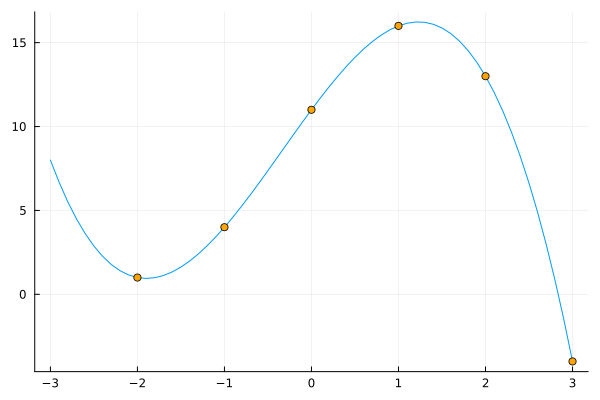

In [61]:
using Plots

x0 = [-2 -1 0 1 2 3];
y0 = [1 4 11 16 13 -4];

p0 = 1;
p1 = (x) -> @. 3*(x+2);
p2 = (x) -> @. 2*(x+2)*(x+1);
p3 = (x) -> @. -1*(x+2)*(x+1)*x;

P = (x) -> @. p0 + p1(x) + p2(x) + p3(x)

x = -3:0.1:3
plot(x,P(x))
scatter!(x0, y0, color=:orange, legend=false)


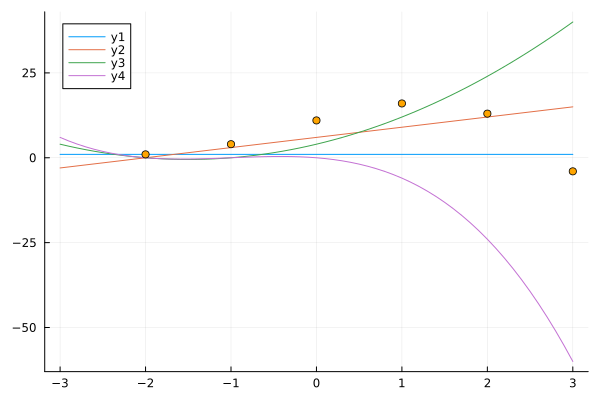

In [62]:
plot(x, ones(size(x)))
plot!(x, p1(x))
plot!(x, p2(x))
plot!(x, p3(x))
scatter!(x0, y0, color=:orange, label="")

## Exercise 4 - Newton Interpolation Cont.

Given the data:


| x    | sin(x)       | cos(x)       |
|------|--------------|--------------|
| 0.70 | 0.6442176872 | 0.7648421873 |
| 0.71 | 0.6518337710 | 0.7583618760 |

... find approximate values of $\sin 0.705$ and $\cos 0.702$ by linear interpolation. What is the error?

It is best to compute this using Julia:

First, we approximate $\sin 0.705$:

In [69]:
x0 = 0.70;
x1 = 0.71;

y0 = 0.6442176872;
y1 = 0.6518337710;

x = 0.705;
p = y0 +(y1 - y0) / (x1 - x0) * (x - x0);
error = sin(0.705) - p;

println(string("sin(0.705) = ", p))
println(string("error = ",error))

sin(0.705) = 0.6480257291
error = 8.10043560717233e-6


In [70]:
x0 = 0.70;
x1 = 0.71;

y0 = 0.7648421873;
y1 = 0.7583618760;

x = 0.702;
p = y0 +(y1 - y0) / (x1 - x0) * (x - x0);
error = cos(0.702)-p;

println(string("cos(0.702) = ", p))
println(string("error = ",error))

cos(0.702) = 0.76354612504
error = 6.098045105207284e-6


## Exercise 5 - Cubic Hermite spline

We are already familiar with composite linear interpolation, where each pair of consecutive interpolation nodes is connected by a linear function:

$$\text{Find }a_{i}, b_{i}:\quad
\varphi_{i}(x) = 
\begin{cases}
    a_{i}\,x+b_{i} \qquad \text{if }x\in[x_{i},x_{i+1}]\\
    0\phantom{_{i}\,x+b_{i}}\qquad \text{otherwise}
\end{cases}$$
$$\text{subject to: }
\begin{cases}
    \varphi_{i}(x_{i}) = y_{i}\\
    \varphi_{i}(x_{i+1}) = y_{i+1}
\end{cases}$$

We obtain the solution to this problem is the following:
$$a_{i} = \frac{y_{i+1}-y_{i}}{x_{i+1}-x_{i}}$$
$$b_{i} = y_{i}-a_{i}x_{i}$$

In [73]:
x0 = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
y0 = [2.0, 1.0, 4.5, 3.0, 0.0, 1.0]

x = minimum(x0):0.01:maximum(x0)

println("Arrays x0 and y0 contain $(length(x0)) nodes.")

Arrays x0 and y0 contain 6 nodes.


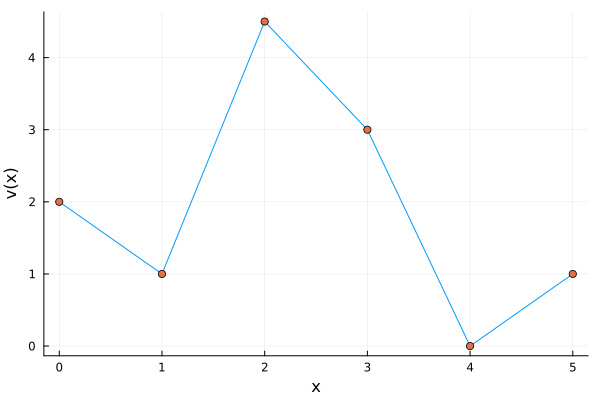

In [74]:
# Define interp1 function
function interp1(x0,y0,x)

    # Sort x0 in ascending order
    x0_sort = sort(x0)
    y0_sort = y0[sortperm(x0)]

    # Compute linear coefficients
    dx0 = diff(x0_sort)
    dy0 = diff(y0_sort)
    a = dy0 ./ dx0
    b = y0_sort[1:end-1] - a .* x0_sort[1:end-1]

    # Evaluate interpolant in all points of x
    y = zeros(length(x))
    for ii = 1:length(x)-1
        _, idx = findmax(x0_sort[x0_sort .<= x[ii]])
        y[ii] = a[idx]*x[ii]+b[idx]
    end
    y[end]=y0_sort[end]

    # Return array y
    return y
end

y1 = interp1(x0,y0,x)

plot(x,y1,label="",xlabel="x",ylabel="v(x)")
scatter!(x0,y0,label="")

This creates a continuous function, but it is not differentiable as the first derivative has discontinuities in the nodes.

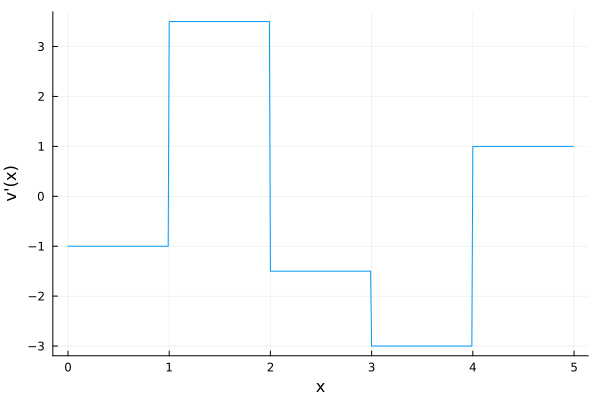

In [76]:
dx = diff(x)
dy1 = diff(y1)
dv1 = dy1 ./ dx

plot(x[1:end-1],dv1,label="",xlabel="x",ylabel="v'(x)")

If we want to generate a continuous and differentiable interpolant, then we need to use a Cubic Hermite spline, defined as follows:

$$
\text{Find }a_{i}, b_{i}, c_{i}, d_{i}:\quad
\varphi_{i}(x) = 
\begin{cases}
    a_{i}\,x^{3}+b_{i}\,x^{2}+c_{i}\,x+d_{i} \qquad \text{if }x\in[x_{i},x_{i+1}]\\
    0\phantom{_{i}\,x^{3}+b_{i}\,x^{2}+c_{i}\,x+d_{i}}\qquad \text{otherwise}
\end{cases}
$$

$$\text{subject to: }
\begin{cases}
    \varphi_{i}(x_{i}) = y_{i}\\
    \varphi_{i}(x_{i+1}) = y_{i+1}\\
    \varphi_{i}'(x_{i}) = \varphi_{i-1}'(x_{i}) = y'_{i}\\
    \varphi_{i}'(x_{i+1}) = \varphi_{i+1}'(x_{i+1}) = y'_{i+1}
\end{cases}$$

This is a linear system with 6 unknowns ($a_{i},b_{i},c_{i},d_{i},y'_{i},y'_{i+1}$) and 4 constraints repeated for $n-1$ intervals.  
The linear system can be written as:

$$
\begin{cases}
    a_{i}\,x_{i}^{3}+b_{i}\,x_{i}^{2}+c_{i}\,x_{i}+d_{i}=y_{i}\\
    a_{i}\,x_{i+1}^{3}+b_{i}\,x_{i+1}^{2}+c_{i}\,x_{i+1}+d_{i}=y_{i+1}\\
    3a_{i}\,x_{i}^{2}+2b_{i}\,x_{i}+c_{i}=y'_{i}\\
    3a_{i}\,x_{i+1}^{2}+2b_{i}\,x_{i+1}+c_{i}=y'_{i+1}
\end{cases}
$$
$$
\begin{bmatrix}
    x_{i}^{3}    &x_{i}^{2}    &x_{i}   &1\\
    x_{i+1}^{3}  &x_{i+1}^{2}  &x_{i+1} &1\\
    3x_{i}^{2}   &2x_{i}^{1}   &1       &0\\
    3x_{i+1}^{2} &2x_{i+1}^{1} &1       &0
\end{bmatrix}
\begin{bmatrix}
    a_{i}\\
    b_{i}\\
    c_{i}\\
    d_{i}
\end{bmatrix}=
\begin{bmatrix}
    y_{i}\\
    y_{i+1}\\
    y'_{i}\\
    y'_{i+1}
\end{bmatrix}
$$

Taking all the equations for all intervals into consideration, we have $5n-4$ unknowns:

* $4*(n-1)$ unknowns for the cubic spline parameters: $a_{i},b_{i},c_{i},d_{i}$ with $1\leq i\leq n-1$.
* $n$ unknowns for the interpolant derivative in the nodes: $y'_{i}$ with $1\leq i\leq n$.

But we only have by $4(n-1)$ equations (4 for each interval), so the system is underconstrained.
We are missing $n$ equations to solve the system and find our unique interpolant (if it exists).

There are multiple strategies to add these constraints, but we will see the *Shape-preserving cubic interpolation*, also called the *Monotone cubic interpolation*.
It means that if the nodes $(x_{i},y_{i})$ are monotonically increasing (or decreasing), then the interpolant will also be monotonically increasing (or decreasing).

This function is called Piecewise Cubic Hermite Interpolation because it uses the Hermite functions ($h_{00}(t)$, $h_{10}(t)$, $h_{01}(t)$, $h_{11}(t)$) to define the cubic spline, once the tangent has been defined.

$$
\varphi_{i}(x) = 
\begin{cases}
    y_{i}\,h_{00}(t) + (x_{i+1}-x_{i})\,y'_{i}\,h_{10}(t) + y_{i+1}\,h_{01}(t) + (x_{i+1}-x_{i})\,y'_{i+1}\,h_{11}(t) \qquad \text{if }x\in[x_{i},x_{i+1}]\\
    0\phantom{_{i}\,h_{00}(t) + (x_{i+1}-x_{i})\,y'_{i}\,h_{10}(t) + y_{i+1}\,h_{01}(t) + (x_{i+1}-x_{i})\,y'_{i+1}\,h_{11}(t)}\qquad \text{otherwise}
\end{cases}
$$
where:
$$
\begin{aligned}
&t = \frac{x-x_{i}}{x_{i+1}-x_{i}}\\
&h_{00}(t) = 2t^{3}-3t^{2}+1\\
&h_{10}(t) = t^{3}-2t^{2}+t\\
&h_{01}(t) = -2t^{3}+3t^{2}\\
&h_{11}(t) = t^{3}-t^{2}
\end{aligned}
$$

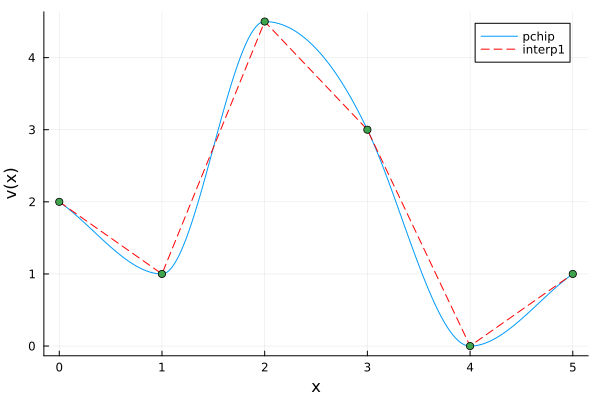

In [84]:
# Define pchip function for Piecewise Cubic Hermite InterPolation = PCHIP
function pchip(x0,y0,x)
    # Sort x0 in ascending order
    x0_sort = sort(x0)
    y0_sort = y0[sortperm(x0)]

    # Define the tangent in the nodes using Monotone cubic interpolation and the Fritsch–Carlson method
        # 1. Define slope of the secant line
    delta = diff(y0_sort) ./ diff(x0_sort)

        # 2. Define tangent in the first and last node as the secant
    m = zeros(length(x0_sort))
    m[1] = delta[1]
    m[end] = delta[end]

        # 3. Loop over all the nodes (except first and last)
    for ii = 2:length(m)-1
        
        if delta[ii-1]*delta[ii] <= 0
            # 3.a. If one of the following conditions is true, set the slope to zero:
                # - If the secant slope of the previous or following interval is zero, then
                #   we have a constant segment.
                # - If the signs of the secant slopes of the previous or following interval are
                #   different, then we have an local extremum in the node (maximum or minimum).
            m[ii] = 0
        else
            # 3.b. Else we set the slope to avoid overshoot and undershoot
            if abs(delta[ii]) >= abs(delta[ii-1])
                m[ii] = min(delta[ii],delta[ii-1])
            else
                m[ii] = max(delta[ii],delta[ii-1])
            end
        end
    end

    # Define Hermite functions
    h00(t) = @. (1 + 2t) * (t - 1) ^ 2;
    h10(t) = @. t * (t - 1) ^ 2;
    h01(t) = @. t ^ 2 * (3 - 2t);
    h11(t) = @. t ^ 2 * (t - 1);
    
    # Evaluate the function in the points of x
    y = zeros(length(x))
    for ii = 1:length(x)-1
        _, idx = findmax(x0_sort[x0_sort .<= x[ii]])

        # t = normalized x; i.e., t in [0,1]
        Delta = x0_sort[idx+1]-x0_sort[idx]
        t = (x[ii]-x0_sort[idx])/Delta

        # Get coordinates and tangents of nodes at boundaries of the interval
        y_i, y_ii = y0_sort[idx], y0_sort[idx+1]
        m_i, m_ii = m[idx], m[idx+1]
        
        # Evaluate Hermite functions
        y[ii] = y_i * h00(t) + Delta * m_i * h10(t) + y_ii * h01(t) + Delta * m_ii * h11(t)

    end
    y[end]=y0_sort[end]

    # Return array y
    return y
end

y2 = pchip(x0,y0,x)
plot(x,y2,label="pchip",xlabel="x",ylabel="v(x)")
plot!(x,y1,label="interp1",color=:red,linestyle=:dash)
scatter!(x0,y0,label="")

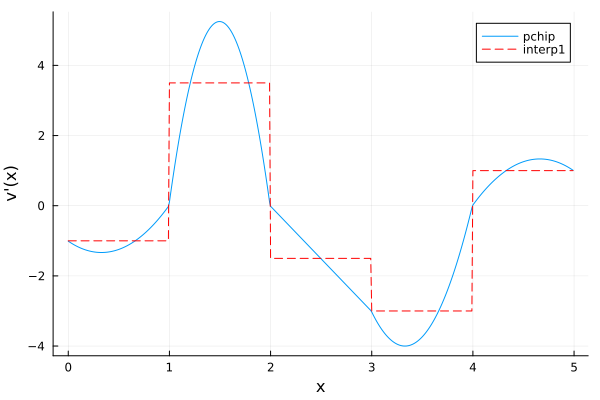

In [85]:
dy2 = diff(y2)
dv2 = dy2 ./ dx

plot(x[1:end-1],dv2,label="pchip",xlabel="x",ylabel="v'(x)")
plot!(x[1:end-1],dv1,label="interp1",color=:red,linestyle=:dash)